In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold

path = './glmhmm/'
sys.path.insert(0, path)
scripts = '../scripts/'
sys.path.insert(1, scripts)

import glm_hmm
from utils import permute_states, find_best_fit, compare_top_weights
from visualize import plot_model_params, plot_loglikelihoods, plot_weights

import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = '1'
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

# set plot design features
font = {'family'   : 'DejaVu Sans',
        'sans-serif' : 'Helvetica',
        'weight'   : 'regular',
        'size'     : 14}

mpl.rc('font', **font)

import pipeline as ppl
import paths

import warnings
warnings.filterwarnings('ignore')

In [7]:
paths.contigency_flip_cask[-3]

'/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/cask/B8M3.CSV'

In [2]:
X, y, feat = ppl.extract_features(paths.contigency_flip_cask[-3], 4, True)
N = X.shape[0] # number of data/time points
K = 3 # number of latent states
C = 2 # number of observation classes
D = X.shape[1] # number of GLM inputs (regressors)
model = glm_hmm.GLMHMM(N,D,C,K,observations="bernoulli")
print(X.shape, y.shape)

(488, 10) (488,)


In [3]:
lls_all, A_all, w_all, pi0, model, bestix = ppl.fit_all(model, X, y, inits=5)

initialization 1 complete
initialization 2 complete
initialization 3 complete
initialization 4 complete
initialization 5 complete


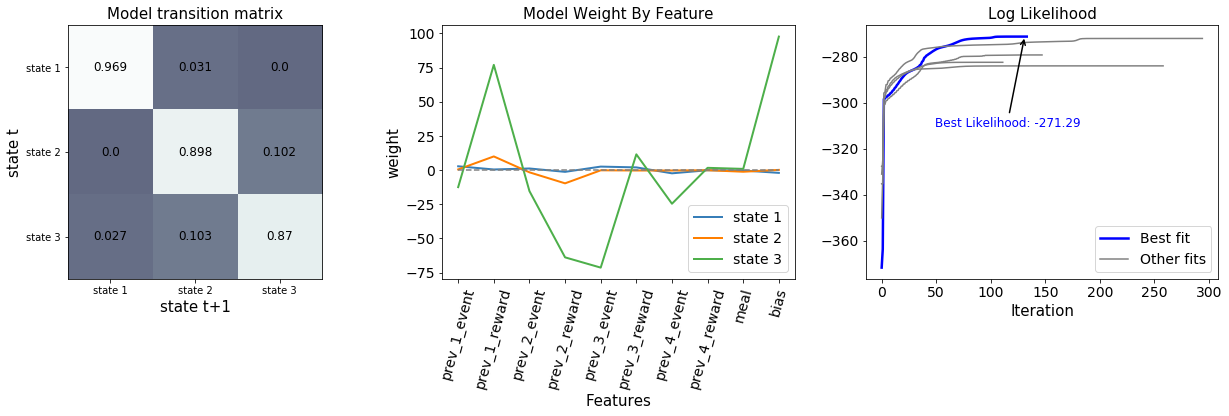

In [4]:
ll = ppl.evaluate_likelihood(model, X, y, A_all[bestix], w_all[bestix])
ppl.graph_fit_all(A_all, w_all, lls_all, feat, ll, bestix)

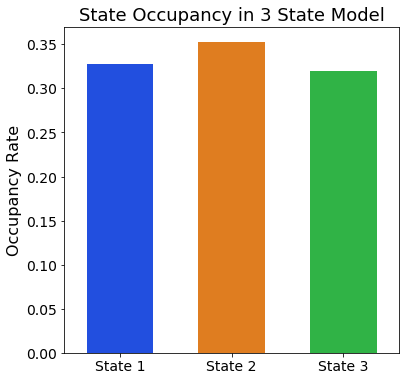

Accuracy of Predicting Mice Behavior: 0.5348360655737705
State 1 Percentage: 0.32786885245901637 ; Accuracy: 0.5
State 2 Percentage: 0.3524590163934426 ; Accuracy: 0.7383720930232558
State 3 Percentage: 0.319672131147541 ; Accuracy: 0.4551282051282051
Overall Accuracy in Model: 0.569672131147541


In [5]:
ppl.display_fitting_results(model, X, y)

In [ ]:
folds = 5
inits = 2

model, lls_all, A_all, w_all, x_test, y_test = ppl.fit_cv(model, X, y, folds, inits)

Initialization 1 complete
Initialization 2 complete
fold 1 complete
Initialization 1 complete
Initialization 2 complete
fold 2 complete
Initialization 1 complete
Initialization 2 complete
fold 3 complete
Initialization 1 complete
Initialization 2 complete
fold 4 complete
Initialization 1 complete
Initialization 2 complete
fold 5 complete


In [ ]:
ppl.cv_evaluate(model, x_test, y_test, A_all, w_all, lls_all)

Inferred LL: -60.541135


In [ ]:
paths.contigency_flip_cask[-3]